# Part 1: Playing with Pandas

In [1]:
#%matplotlib widgets
# this is a almost "for free" way to get interactivity

import matplotlib.pyplot as plt
import matplotlib

import numpy as np

# import the pandas package
import pandas as pd

In [7]:
# loading from a local location
buildings = pd.read_csv("/Users/jillnaiman/Downloads/building_inventory.csv")

# can also load CSV files from the web (can be slower)
# (things can also go wrong here (stuff with the "requests" package))
#buildings = pd.read_csv("https://uiuc-ischool-dataviz.github.io/is445_spring2021/week02/data/building_inventory.csv")

In [8]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


In [9]:
buildings.index # an iterable

RangeIndex(start=0, stop=8862, step=1)

Reminder: lists and slicing in Python:

In [10]:
myList = [3,4,5,6]

In [11]:
myList[:3]

[3, 4, 5]

In [12]:
myList[1:2]

[4]

We can slice a Pandas dataset very similiarly to a Python list:

In [14]:
buildings.iloc[0:3] # you can think of iloc as "index location"

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [16]:
buildings.iloc[50:55]["Agency Name"] # of the rows 50-54, what are the Agency Names associated

50    Department of Natural Resources
51    Department of Natural Resources
52    Department of Natural Resources
53    Department of Natural Resources
54    Department of Natural Resources
Name: Agency Name, dtype: object

We can use numpy-like functions (often they are simply numpy functions) on Panda dataframes:

In [17]:
buildings["Agency Name"].nunique() # how many unique agency names in my dataset

35

In [18]:
buildings["Bldg Status"].unique() # give values of unique entries in Bldg Status

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

Similar to something like the "summary" function in R, we have the "describe" function in Pandas:

In [19]:
buildings.describe() # summary stats from the numerical columns (categorical are left out!)

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


We can use other functions to *filter* our dataset in Pandas:

In [20]:
buildings.loc[buildings["Square Footage"]==0] # boolean operation to look for only buildings with 0 square footage

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
74,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Assembly,Assembly,Not provided
76,Department of Natural Resources,Rock Island Trail State Park - Stark County,"Rr #1, Box 64",Wyoming,61491,Stark,18,Darin M. LaHood,73,Spain Ryan,...,In Use,1988,1988,0,1,1,0,Business,Business,Not provided
181,Department of Corrections,Vandalia Correctional Center - Fayette County,"P.o. Box 500, Rte. 51 N.",Vandalia,62471,Fayette,15,John Shimkus,107,Cavaletto John,...,In Use,2001,2001,0,1,1,0,Industrial,Industrial,Not provided
333,Department of Transportation,Gurnee - Lake County,3516 West Washington Street,Gurnee,60031,Lake,18,Darin M. LaHood,99,Wojcicki Jimene Sara,...,In Use,2001,2001,0,1,1,0,Storage,Storage,Not provided
421,Northern Illinois University,Northern Illinois University - DeKalb,Northern Illinois University,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1999,1999,0,2,1,1,Education,Education,Not provided
422,Northern Illinois University,Northern Illinois University - DeKalb,1805 West Lincoln Hwy,Dekalb,60115,DeKalb,16,Adam Kinzinger,70,Pritchard Robert W.,...,In Use,1997,1920,0,4,3,1,Storage,Storage,Not provided
507,Department of Natural Resources,Chain O'Lakes CA and SP - McHenry County,39947 North State Park Road,Spring Grove,60081,McHenry,14,Randy Hultgren,64,Wheeler Barbara,...,In Use,2001,2001,0,1,1,0,Residential,Residential,Not provided
540,Department of Agriculture,DuQuoin State Fairgrounds - Perry County,"Route #2, Box 306",Duquoin,62832,Perry,12,Mike Bost,115,Bryant Terri,...,In Use,1988,1988,0,1,1,0,Storage,Storage,Not provided
551,Department of Natural Resources,Nauvoo State Park - Hancock County,So Sidney,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Storage,Storage,Not provided
552,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,0,0,1,1,0,Residential,Residential,Not provided


In [21]:
buildings.loc[buildings["Bldg Status"]=="In Progress"]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
772,Department of Veterans' Affairs,Quincy Veterans' Home - Adams County,1707 North 12th Street,Quincy,62301,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2010,2010,5200,1,1,0,Storage,Storage,Not provided
792,Chicago State University,Chicago State University - Cook County,95th & King Dirve,Chicago,60628,Cook,1,Bobby L. Rush,34,"Sims, Jr. Elgie R.",...,In Progress,2010,2010,30000,2,2,0,Education,Education,Not provided
796,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
797,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
798,Department of Natural Resources,Nauvoo State Park - Hancock County,Kimball Street,Nauvoo,62354,Hancock,18,Darin M. LaHood,94,Frese Randy E.,...,In Progress,2011,2011,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018,2018,1455,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017,2017,6720,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019,2019,760,1,0,0,Business,Business,NaN


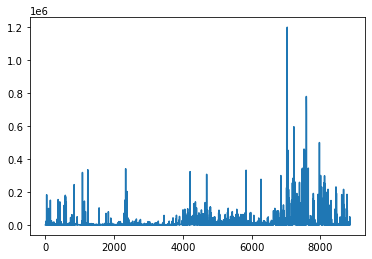

In [24]:
buildings['Square Footage'].plot()
plt.show() # matplotlib is the "viz engine" driving these plots

In [25]:
buildings.plot?

We can make use of matplotlib-like plotting to make fancier plots:

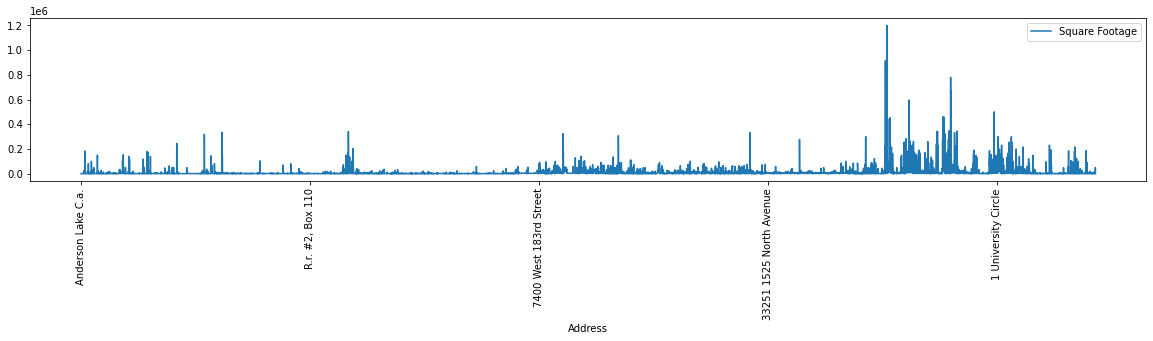

In [29]:
buildings.plot(x="Address", y="Square Footage", figsize=(20,3), rot=90)

We can go between matplotlib-type ax calls and Pandas plots:

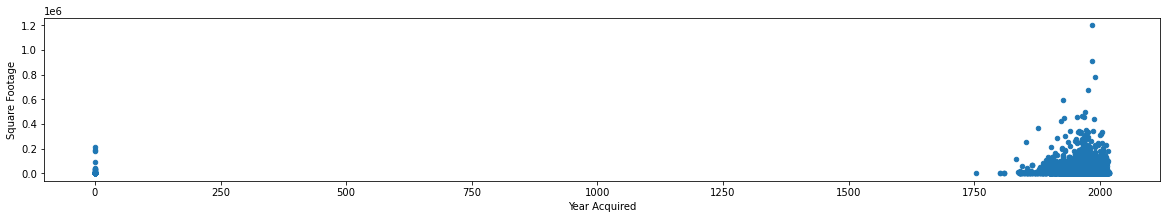

In [31]:
ax = buildings.plot(x="Year Acquired", y = "Square Footage", figsize=(20,3), kind='scatter')

(1750.0, 2021.0)

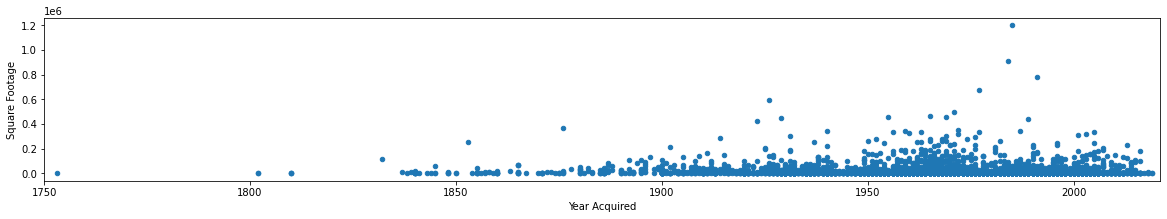

In [34]:
ax = buildings.plot(x="Year Acquired", y = "Square Footage", figsize=(20,3), kind='scatter')
ax.set_xlim(1750,2021)

In addition to making quick plots, we can use Pandas to do more complex data filter/mutations:

In [35]:
buildings.groupby("Bldg Status") # this doesn't really do anything until you operation on a group

In [36]:
for g in buildings.groupby("Bldg Status"):
    print(g)

('Abandon',                                     Agency Name  \
381                Department of Human Services   
449             Department of Natural Resources   
1050            Department of Natural Resources   
1139  Department of Central Management Services   
1172            Department of Natural Resources   
...                                         ...   
8682             Department of Military Affairs   
8683             Department of Military Affairs   
8760               Historic Preservation Agency   
8800             Department of Military Affairs   
8801             Department of Military Affairs   

                                         Location Name  \
381        Lincoln Developmental Center - Logan County   
449       Clinton Lake Recreation Area - DeWitt County   
1050           Jim Edgar Panther Creek F&WA - Cass Co.   
1139                                 Statewide Program   
1172   Saline County Conservation Area - Saline County   
...                        

In [38]:
for status_name, g in buildings.groupby("Bldg Status"):
    print(status_name, g.shape[0])

Abandon 226
In Progress 113
In Use 8523


In [39]:
buildings["Square Footage"].max()

1200000

In [40]:
buildings["Square Footage"].min()

0

We can filter out "bad data" when we read in the CSV file:

In [41]:
b = pd.read_csv("/Users/jillnaiman/Downloads/building_inventory.csv",
           na_values = {'Square Footage': 0,
                       'Year Acquired': 0,
                       'Year Constructed': 0}) # specifying what happens with incomplete entries

In [42]:
b["Square Footage"].min()

9.0

A few more groupby aggregating:

In [45]:
b.groupby("Year Acquired")["Square Footage"].sum() # the total square footage in a year (sum)

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

In [46]:
agg_data = b.groupby("Year Acquired")["Square Footage"].sum()

In [47]:
type(agg_data)

pandas.core.series.Series

In [48]:
type(b)

pandas.core.frame.DataFrame

In [50]:
agg_data

Year Acquired
1753.0      1200.0
1802.0      4440.0
1810.0      4033.0
1832.0    120000.0
1837.0     10302.0
            ...   
2015.0    305093.0
2016.0    304839.0
2017.0      6720.0
2018.0     17160.0
2019.0      1520.0
Name: Square Footage, Length: 171, dtype: float64

In [51]:
agg_data.index # the year column in my Series

Float64Index([1753.0, 1802.0, 1810.0, 1832.0, 1837.0, 1838.0, 1839.0, 1840.0,
              1841.0, 1843.0,
              ...
              2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0,
              2018.0, 2019.0],
             dtype='float64', name='Year Acquired', length=171)

In [53]:
agg_data.values # total square footage

array([1.200000e+03, 4.440000e+03, 4.033000e+03, 1.200000e+05,
       1.030200e+04, 2.010000e+03, 1.175200e+04, 3.691800e+04,
       3.256000e+03, 9.000000e+02, 4.088000e+03, 6.584600e+04,
       2.129200e+04, 2.267000e+03, 2.550000e+05, 2.140000e+03,
       6.615400e+04, 7.500000e+02, 1.812400e+04, 2.236700e+04,
       4.847000e+03, 2.741700e+04, 1.579500e+04, 2.234940e+05,
       2.700000e+03, 2.864000e+03, 6.403000e+03, 1.490000e+04,
       1.100000e+04, 6.600000e+03, 3.808000e+03, 4.042800e+05,
       3.307100e+04, 1.798330e+05, 6.671000e+03, 5.926600e+04,
       8.725000e+03, 3.015700e+04, 1.683700e+05, 1.948230e+05,
       8.492400e+04, 8.633400e+04, 2.325000e+03, 1.514800e+05,
       3.959000e+04, 8.500000e+04, 2.256770e+05, 2.901650e+05,
       1.329070e+05, 3.676000e+04, 1.214750e+05, 3.358350e+05,
       1.094860e+05, 2.697250e+05, 1.605840e+05, 4.096400e+04,
       3.128860e+05, 2.037400e+04, 1.332850e+05, 3.602520e+05,
       2.982830e+05, 2.314110e+05, 2.377220e+05, 4.2281

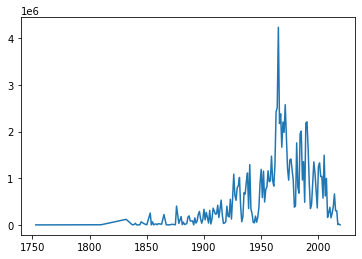

In [54]:
plt.plot(agg_data.index, agg_data.values) # plotting with matplotlib

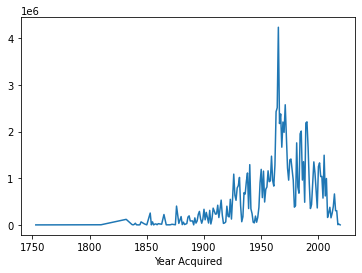

In [56]:
agg_data.plot() # using Pandas (based on the matplotlib engine)

In [59]:
#stats = agg_data.describe() # this is after I already summed!
stats = b.groupby("Year Acquired")["Square Footage"].describe() # instead of sum (1 operation), full stats

In [60]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [61]:
type(stats)

pandas.core.frame.DataFrame

In [62]:
stats.loc[2000] # this gives us the stats for a particular year

count       357.000000
mean       3498.002801
std       11276.816349
min          24.000000
25%         144.000000
50%         234.000000
75%        1584.000000
max      131835.000000
Name: 2000.0, dtype: float64

In [63]:
stats.iloc[0] # first entry

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: 1753.0, dtype: float64

We started with buildings dataset $\rightarrow$ groupby on Year Aquired with Square Footage $\rightarrow$ stats is our new dataframe

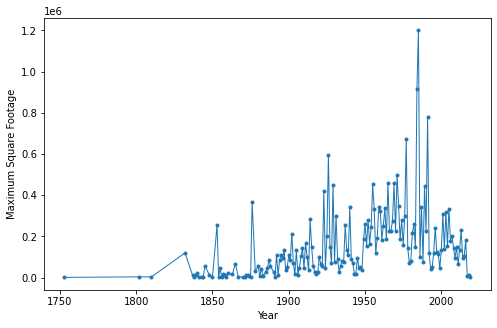

In [70]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(stats["max"], '.-', linewidth=1)
ax.set_xlabel("Year")
ax.set_ylabel("Maximum Square Footage")
plt.show()

Here we are using both lines and dots to show the trends (lines) but also the fact that there are individual year measurements (dots).

Its hard to see the full range of the data -- probably want to do some kind of transformation (y-axis).

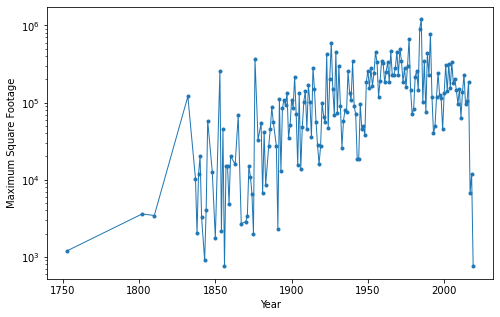

In [71]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(stats["max"], '.-', linewidth=1)
ax.set_xlabel("Year")
ax.set_ylabel("Maximum Square Footage")
ax.set_yscale("log") # powers of 10 -- now length is NOT linearly connected to data
plt.show()

Building toward color maps -- plotting style (not just colormaps but also text size/font, background, etc) -- important choices for designing for low-vision viewers.

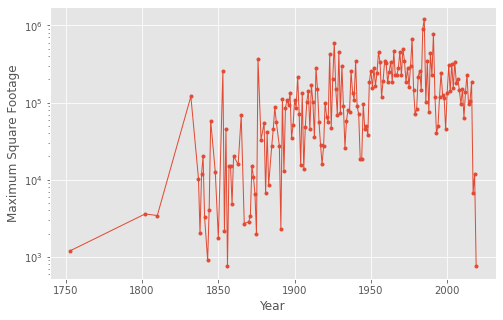

In [72]:
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(stats["max"], '.-', linewidth=1)
ax.set_xlabel("Year")
ax.set_ylabel("Maximum Square Footage")
ax.set_yscale("log") # powers of 10 -- now length is NOT linearly connected to data
plt.show()

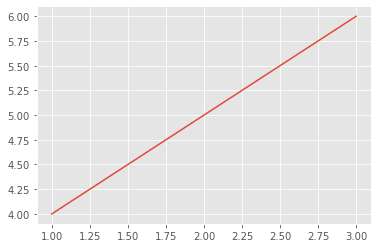

In [74]:
plt.plot([1,2,3], [4,5,6]) # now everything in the style of ggplot

In [75]:
plt.style.use("default")

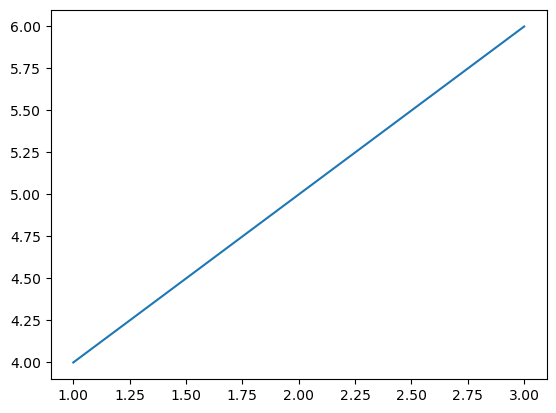

In [76]:
plt.plot([1,2,3],[4,5,6])

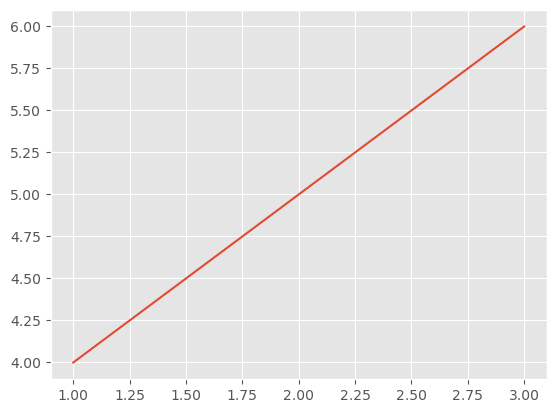

In [77]:
with plt.style.context("ggplot"):
    plt.plot([1,2,3], [4,5,6])

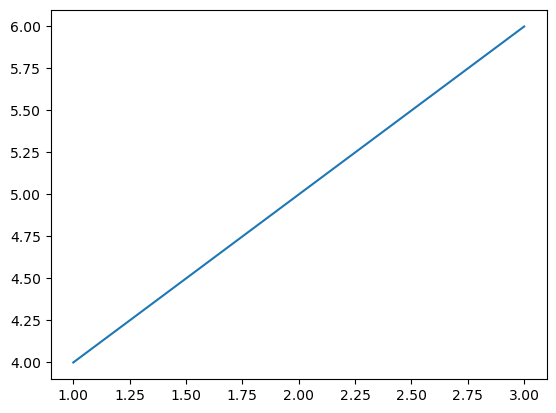

In [78]:
plt.plot([1,2,3], [4,5,6])

For doing tabs of sections of highlighted code:
 * CMD + ] (Mac and Linux?)
 * CTRL + ] (Windows)

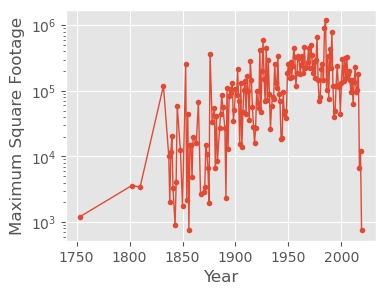

In [81]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize=(4,3))

    ax.plot(stats["max"], '.-', linewidth=1)
    ax.set_xlabel("Year")
    ax.set_ylabel("Maximum Square Footage")
    ax.set_yscale("log") # powers of 10 -- now length is NOT linearly connected to data
    plt.show()

The `with` statement is good for "temporary" plotting styles but also will be useful for interactivity.

In [83]:
plt.style.available # list of all available styles in matplotlib

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [85]:
# make a function that will plot with a specific style:
def make_plot(style):
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(4,3))

        ax.plot(stats["max"], '.-', linewidth=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("Maximum Square Footage")
        ax.set_yscale("log") # powers of 10 -- now length is NOT linearly connected to data
        plt.show()

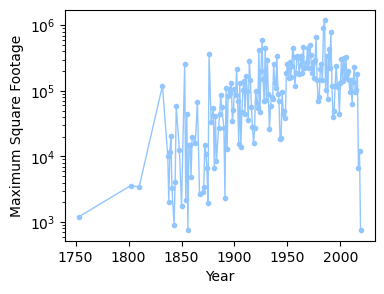

In [86]:
make_plot("seaborn-pastel")

In [84]:
import ipywidgets # no details just yet on this, stay tuned for the next few weeks!

In [88]:
@ipywidgets.interact(style=plt.style.available) # "style="
def make_plot(style): # input to our function is "style"
    with plt.style.context(style): # "style" as our context
        fig, ax = plt.subplots(figsize=(3,2))

        ax.plot(stats["max"], '.-', linewidth=1)
        ax.set_xlabel("Year")
        ax.set_ylabel("Maximum Square Footage")
        ax.set_yscale("log") # powers of 10 -- now length is NOT linearly connected to data
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

# 2. Actually getting to colormaps!

In [89]:
import matplotlib.cm as cm # all colormap stuff in matplotlib

In [93]:
cm.Reds # red-based sequential colormap

In [94]:
cm.Blues

In [95]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

You can see where this is going: visualize colormaps and then do it interactivily with a widget:

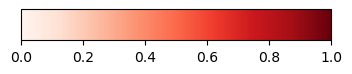

In [98]:
fig, ax = plt.subplots(figsize=(4,0.4))
col_map_name = 'Reds'
col_map = plt.get_cmap(col_map_name)
matplotlib.colorbar.ColorbarBase(ax, cmap=col_map, orientation='horizontal')
plt.show()

In [99]:
def plot_colormap(col_map_name):
    fig, ax = plt.subplots(figsize=(4,0.4))
    #col_map_name = 'Reds'
    col_map = plt.get_cmap(col_map_name)
    matplotlib.colorbar.ColorbarBase(ax, cmap=col_map, orientation='horizontal')
    plt.show()

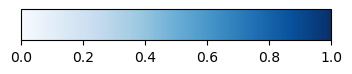

In [100]:
plot_colormap("Blues")

In [101]:
@ipywidgets.interact(col_map_name = plt.colormaps())
def plot_colormap(col_map_name):
    fig, ax = plt.subplots(figsize=(4,0.4))
    #col_map_name = 'Reds'
    col_map = plt.get_cmap(col_map_name)
    matplotlib.colorbar.ColorbarBase(ax, cmap=col_map, orientation='horizontal')
    plt.show()

interactive(children=(Dropdown(description='col_map_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …

In [103]:
@ipywidgets.interact(col_map_name = plt.colormaps())
def plot_colormap(col_map_name):
    fig, ax = plt.subplots(figsize=(8,0.6))
    #col_map_name = 'Reds'
    col_map = plt.get_cmap(col_map_name)
    matplotlib.colorbar.ColorbarBase(ax, cmap=col_map, orientation='horizontal')
    ax.xaxis.set_visible(False)
    plt.show()

interactive(children=(Dropdown(description='col_map_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …

Let's compare these visual representations of the color ranges in a colormap with its RGB componets (in math!)

In [104]:
col_map = plt.get_cmap("jet")

In [105]:
col_map

In [106]:
color_steps = np.linspace(0, 1.0, 256) # 0-1 in 256 steps

In [108]:
color_steps.shape

(256,)

In [112]:
colors = col_map(color_steps)[:,:3]

In [113]:
colors.shape

(256, 3)

In [114]:
colors

array([[0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 5.17825312e-01],
       [0.00000000e+00, 0.00000000e+00, 5.35650624e-01],
       [0.00000000e+00, 0.00000000e+00, 5.53475936e-01],
       [0.00000000e+00, 0.00000000e+00, 5.71301248e-01],
       [0.00000000e+00, 0.00000000e+00, 5.89126560e-01],
       [0.00000000e+00, 0.00000000e+00, 6.06951872e-01],
       [0.00000000e+00, 0.00000000e+00, 6.24777184e-01],
       [0.00000000e+00, 0.00000000e+00, 6.42602496e-01],
       [0.00000000e+00, 0.00000000e+00, 6.60427807e-01],
       [0.00000000e+00, 0.00000000e+00, 6.78253119e-01],
       [0.00000000e+00, 0.00000000e+00, 6.96078431e-01],
       [0.00000000e+00, 0.00000000e+00, 7.13903743e-01],
       [0.00000000e+00, 0.00000000e+00, 7.31729055e-01],
       [0.00000000e+00, 0.00000000e+00, 7.49554367e-01],
       [0.00000000e+00, 0.00000000e+00, 7.67379679e-01],
       [0.00000000e+00, 0.00000000e+00, 7.85204991e-01],
       [0.00000000e+00, 0.00000

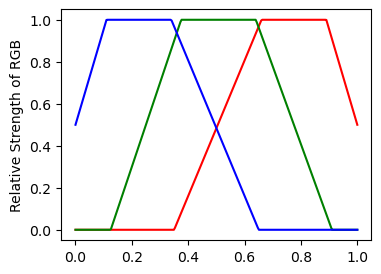

In [121]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(color_steps, colors[:,0], '-r') # red channel
ax.plot(color_steps, colors[:,1], '-g') # green channel
ax.plot(color_steps, colors[:,2], '-b') # blue channel
ax.set_ylabel("Relative Strength of RGB")

plt.show()

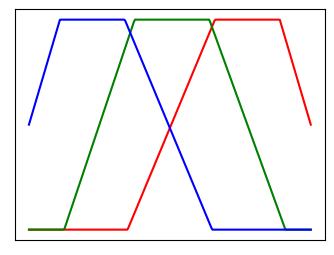

In [122]:
fig, ax = plt.subplots(figsize=(4,3)) # this one axes object is "taking the whole space" of the figure
ax.plot(color_steps, colors[:,0], '-r') # red channel
ax.plot(color_steps, colors[:,1], '-g') # green channel
ax.plot(color_steps, colors[:,2], '-b') # blue channel
ax.set_ylabel("Relative Strength of RGB")

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

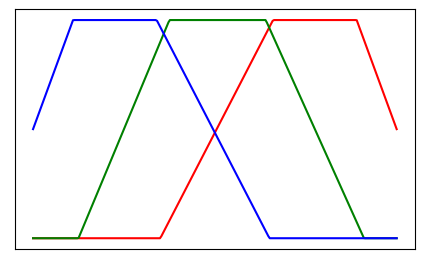

In [126]:
fig = plt.figure(figsize=(4,3)) # I will make a figure object, but not specify axes

#                 left, bottom, width, height
ax = fig.add_axes([0.0, 0.15,   1.0,   0.8])

ax.plot(color_steps, colors[:,0], '-r') # red channel
ax.plot(color_steps, colors[:,1], '-g') # green channel
ax.plot(color_steps, colors[:,2], '-b') # blue channel
ax.set_ylabel("Relative Strength of RGB")

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show() 
# so far, nothing looks different, but we'll add in colorbar on bottom

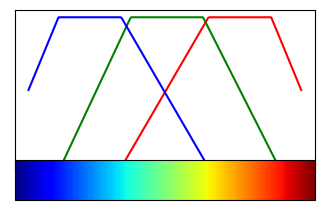

In [130]:
col_map = plt.get_cmap("jet") # hard coded colormap (step 1 in "widgetizing")

fig = plt.figure(figsize=(3,2)) # I will make a figure object, but not specify axes

# (I) Set of "math" representation of our color map
#                 left, bottom, width, height
ax = fig.add_axes([0.0, 0.15,   1.0,   0.8])

ax.plot(color_steps, colors[:,0], '-r') # red channel
ax.plot(color_steps, colors[:,1], '-g') # green channel
ax.plot(color_steps, colors[:,2], '-b') # blue channel
#ax.set_ylabel("Relative Strength of RGB")

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# (II) The colorbar representation of our colormap
#                          left, bottom, width, height
ax_colorbar = fig.add_axes([0.0, 0.0,    1.0 ,   0.2])
matplotlib.colorbar.ColorbarBase(ax_colorbar, cmap = col_map, orientation='horizontal')
ax_colorbar.xaxis.set_visible(False)

plt.show() 

In [133]:
#col_map = plt.get_cmap("jet") # hard coded colormap (step 1 in "widgetizing")

def plot_colormap(col_map_name): # step 2 in "widgetizing" is making a function
    col_map = plt.get_cmap(col_map_name)
    fig = plt.figure(figsize=(3,2)) # I will make a figure object, but not specify axes

    # (I) Set of "math" representation of our color map
    #                 left, bottom, width, height
    ax = fig.add_axes([0.0, 0.15,   1.0,   0.8])

    colors = col_map(color_steps)[:,:3]
    ax.plot(color_steps, colors[:,0], '-r') # red channel
    ax.plot(color_steps, colors[:,1], '-g') # green channel
    ax.plot(color_steps, colors[:,2], '-b') # blue channel

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # (II) The colorbar representation of our colormap
    #                          left, bottom, width, height
    ax_colorbar = fig.add_axes([0.0, 0.0,    1.0 ,   0.2])
    matplotlib.colorbar.ColorbarBase(ax_colorbar, cmap = col_map, orientation='horizontal')
    ax_colorbar.xaxis.set_visible(False)

    plt.show() 

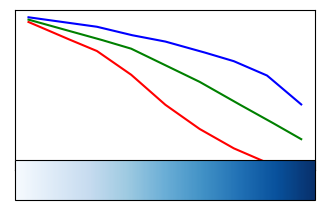

In [134]:
plot_colormap("Blues")

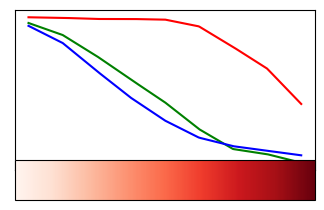

In [135]:
plot_colormap("Reds")

In [136]:
@ipywidgets.interact(col_map_name = plt.colormaps()) # step 3 in "widgetizing"
def plot_colormap(col_map_name): # step 2 in "widgetizing" is making a function
    col_map = plt.get_cmap(col_map_name)
    fig = plt.figure(figsize=(3,2)) # I will make a figure object, but not specify axes

    # (I) Set of "math" representation of our color map
    #                 left, bottom, width, height
    ax = fig.add_axes([0.0, 0.15,   1.0,   0.8])

    colors = col_map(color_steps)[:,:3]
    ax.plot(color_steps, colors[:,0], '-r') # red channel
    ax.plot(color_steps, colors[:,1], '-g') # green channel
    ax.plot(color_steps, colors[:,2], '-b') # blue channel

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # (II) The colorbar representation of our colormap
    #                          left, bottom, width, height
    ax_colorbar = fig.add_axes([0.0, 0.0,    1.0 ,   0.2])
    matplotlib.colorbar.ColorbarBase(ax_colorbar, cmap = col_map, orientation='horizontal')
    ax_colorbar.xaxis.set_visible(False)

    plt.show() 

interactive(children=(Dropdown(description='col_map_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …

# 3. Applying colormaps to data (finally!)

In [141]:
michigan_dataset_name = '/Users/jillnaiman/Downloads/michigan_lld.flt'
michigan = np.fromfile(michigan_dataset_name, dtype='f4').reshape((5365,4201))
# for this, I had to know that this dataset was in this 2D shape

In [142]:
michigan

array([[-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       ...,
       [   58.87491 ,    59.874924,    58.874954, ...,    85.95175 ,
           89.95175 ,    89.95178 ],
       [   58.87491 ,    60.874924,    57.87494 , ...,    92.95175 ,
           89.95175 ,    84.95178 ],
       [   55.87491 ,    57.874924,    58.87494 , ...,    87.95175 ,
           85.95175 ,    83.95178 ]], dtype=float32)

(array([  285668.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 22252697.]),
 array([-9999.     , -8963.905  , -7928.8115 , -6893.717  , -5858.6226 ,
        -4823.5283 , -3788.4338 , -2753.3396 , -1718.2452 ,  -683.1509 ,
          351.94348], dtype=float32),
 <a list of 10 Patch objects>)

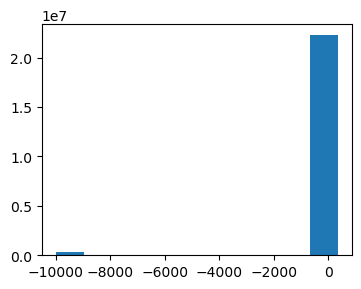

In [145]:
fig,ax = plt.subplots(figsize=(4,3))
ax.hist(michigan.flat)

In [146]:
michigan.min() # tagging areas of no data

-9999.0

In [147]:
# we want to ignore these datapoints in mapping between data and map:
michigan[michigan == -9999] = np.nan

In [150]:
np.nanmin(michigan), np.nanmax(michigan)

(-275.89, 351.94348)

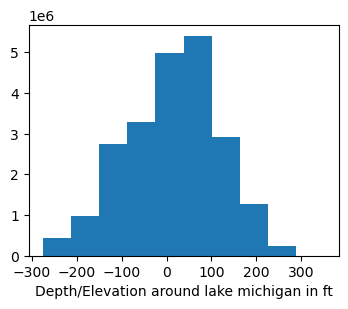

In [154]:
fig,ax = plt.subplots(figsize=(4,3))
ax.hist(michigan.flat)
ax.set_xlabel("Depth/Elevation around lake michigan in ft")
plt.show()

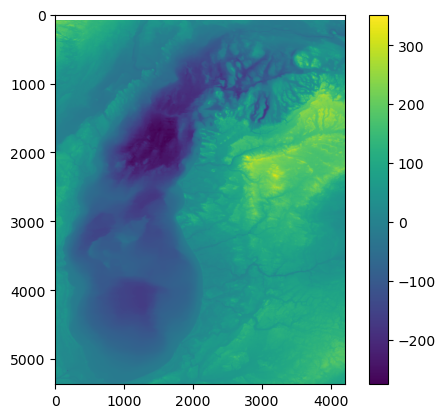

In [160]:
#fig, ax=plt.subplots(figsize=(3,4))
plt.imshow(michigan)
plt.colorbar()
plt.show()

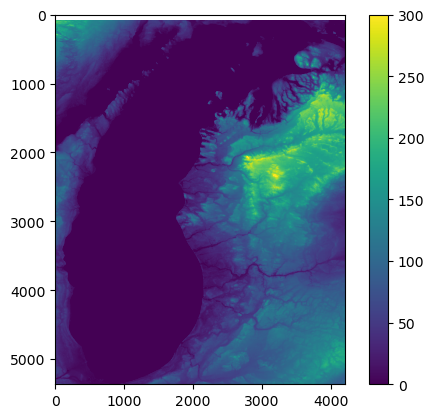

In [161]:
plt.imshow(michigan)
plt.clim(0, 300) # setting the limit of the color axis
plt.colorbar()
plt.show()

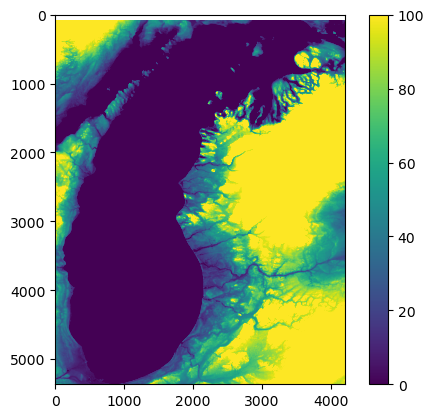

In [162]:
plt.imshow(michigan)
plt.clim(0, 100) # setting the limit of the color axis
plt.colorbar()
plt.show()

Even with this colormap (default) we see that we can't get a sense of the full range of the data AND see details of important things (like where the lake actually is).  Try a diverging colormap:

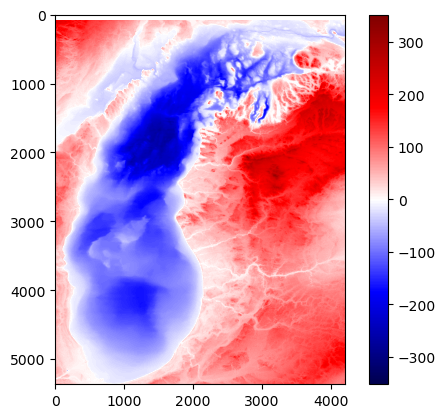

In [165]:
plt.imshow(michigan, cmap='seismic')
plt.clim(-352,352) # setting the limit of the color axis
plt.colorbar()
plt.show()

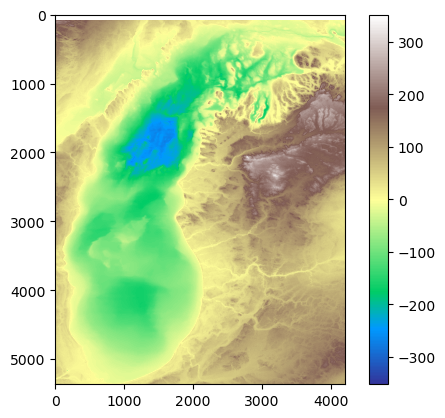

In [166]:
plt.imshow(michigan, cmap='terrain')
plt.clim(-352,352) # setting the limit of the color axis
plt.colorbar()
plt.show()

Better diverging colormap, but still not as intuative -- we expect the lake to be very blue and the surrounding land to be brown -- so we can do some remapping/rescaling:

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


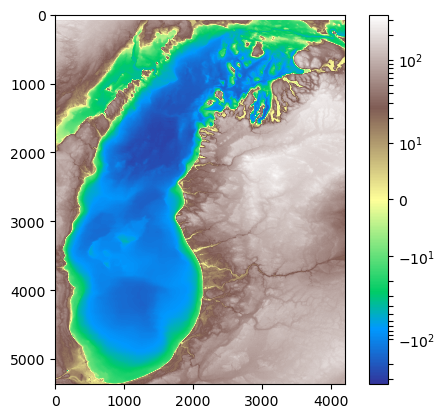

In [171]:
plt.imshow(michigan, cmap='terrain', norm = matplotlib.colors.SymLogNorm(10)) # hardcoded color map
plt.clim(-352,352) # setting the limit of the color axis
plt.colorbar()
plt.show()

In [169]:
np.log(np.abs(-300))

5.703782474656201

In [172]:
def plot_michigan_color(col_map_name):
    plt.imshow(michigan, cmap=col_map_name, norm = matplotlib.colors.SymLogNorm(10))
    plt.clim(-352,352) # setting the limit of the color axis
    plt.colorbar()
    plt.show()

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


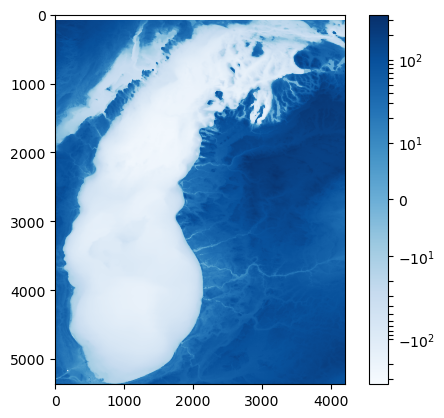

In [173]:
plot_michigan_color("Blues")

In [176]:
@ipywidgets.interact(col_map_name = plt.colormaps(), sym_log=True) # step 3 in "widgetizing"
def plot_michigan_color(col_map_name, sym_log):
    if sym_log:
        plt.imshow(michigan, cmap=col_map_name, norm = matplotlib.colors.SymLogNorm(10))
    else:
        plt.imshow(michigan, cmap=col_map_name)
    plt.clim(-352,352) # setting the limit of the color axis
    plt.colorbar()
    plt.show()

interactive(children=(Dropdown(description='col_map_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …